In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
data=pd.read_csv('E:\\download\\bank-full.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# get dummies for catagorical data
data1=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month',])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Conversion of column into binary data
data1['default'] = np.where(data1['default'].str.contains("no"), 0, 1)
data1['housing'] = np.where(data1['housing'].str.contains("no"), 0,1)
data1['loan'] = np.where(data1['loan'].str.contains("no"), 0, 1)
data1['y'] = np.where(data1['y'].str.contains("no"), 0, 1)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

# Model building

In [8]:
# Dividing our data into input and output variables
X = pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
Y =data1.iloc[:,10]

In [9]:
# Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# classes in the data
classifier.classes_

array([0, 1])

In [11]:
# predicted probability in favour of 0 on left side and 1 on right side
np.set_printoptions(suppress=True)
pred_prob = classifier.predict_proba(X)[0:15]
pred_prob

array([[0.95636048, 0.04363952],
       [0.97558506, 0.02441494],
       [0.9820298 , 0.0179702 ],
       [0.97971526, 0.02028474],
       [0.89634913, 0.10365087],
       [0.96006606, 0.03993394],
       [0.94850739, 0.05149261],
       [0.90310022, 0.09689978],
       [0.97989319, 0.02010681],
       [0.98247099, 0.01752901],
       [0.95891969, 0.04108031],
       [0.96822061, 0.03177939],
       [0.92430955, 0.07569045],
       [0.98162344, 0.01837656],
       [0.98027949, 0.01972051]])

In [12]:
# dataframe of the predicted probability
pred_prob = pd.DataFrame(pred_prob)
pred_prob['y_pred'] = classifier.predict(X)[0:15]
pred_prob

,0,1,y_pred
0,0.956360,0.043640,0
1,0.975585,0.024415,0
2,0.982030,0.017970,0
3,0.979715,0.020285,0
4,0.896349,0.103651,0
5,0.960066,0.039934,0
6,0.948507,0.051493,0
7,0.903100,0.096900,0
8,0.979893,0.020107,0
9,0.982471,0.017529,0


In [13]:
# Direct prediction for dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [14]:
# dataframe for actual values and predicted values
y_pred_df=pd.DataFrame({'Actual':Y,'Predicted':y_pred})
y_pred_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [15]:
TP = len(y_pred_df[(y_pred_df['Actual']==1)&(y_pred_df['Predicted']==1)])
print('True positive is:',TP)
TN = len(y_pred_df[(y_pred_df['Actual']==0)&(y_pred_df['Predicted']==0)])
print('True negative is:',TN)
FP = len(y_pred_df[(y_pred_df['Actual']==0)&(y_pred_df['Predicted']==1)])
print('False positive is:',FP)
FN = len(y_pred_df[(y_pred_df['Actual']==1)&(y_pred_df['Predicted']==0)])
print('False negative is:',FN)

True positive is: 1167
True negative is: 39155
False positive is: 767
False negative is: 4122


In [16]:
# Accuracy of the model
classifier.score(X,Y)

0.8918625998097808

In [17]:
# confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
cm

array([[39155,   767],
       [ 4122,  1167]], dtype=int64)

# Model validation

In [20]:
# checking for sensitivity
Senstivity = TP/(TP+FN)
print('Senstivity is:',round(Senstivity,2))

Senstivity is: 0.22


In [22]:
# checking for specificity
Specificity = (TN/(TN+FP))
print('Specificity is:',round(Specificity,2))

Specificity is: 0.98


In [25]:
# checking for precision
Precision = TP/(TP+FP)
print('Precision is:',round(Precision,2))

Precision is: 0.6


In [28]:
# checking for F-score
F_score = (2*Precision*Senstivity)/(Precision+Senstivity)
print('F_score is:',round(F_score,2))

F_score is: 0.32


auc accuracy: 0.6007170803827532


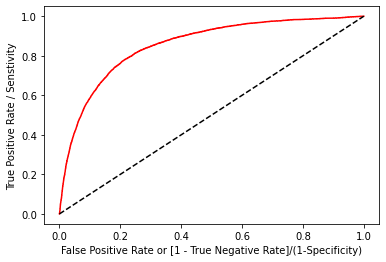

In [30]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)
print('auc accuracy:',auc)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]/(1-Specificity)')
plt.ylabel('True Positive Rate / Senstivity')
plt.show()



Accuracy is greater than 0.5 so we can say that the has subscribed a term deposite